# **Importing the libraries**

In [1]:
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
from sklearn.model_selection import KFold 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell
from sklearn import metrics #accuracy measure

## **Importing the dataset**

In [2]:
data = pd.read_csv('data.csv')
data = data[data['age'] < 100]
data.replace(-1, np.nan, inplace=True)
data = data.dropna()
data = data[(data['gender'] < 3) & (data['gender'] > 0)]
lbl = LabelBinarizer()
data['gender'] = lbl.fit_transform(data['gender']).flatten()
data = data[data.accuracy >= 80]

# **Data Preprocesing**

In [3]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2.0,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,1.0,5.0,4.0,4.0,4.0,2.0,3.0,3.0,1.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,4.0,3.5,3.0,2.3,25,1,100
1,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,5.0,4.0,2.0,2.0,3.0,2.0,3.0,3.0,4.0,2.0,2.0,5.0,1.0,2.0,4.0,4.0,3.0,1.0,3.3,3.5,3.3,2.4,44,1,90
4,1.0,4.0,2.0,2.0,3.0,5.0,4.0,1.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,5.0,3.0,3.0,1.0,1.0,5.0,2.0,3.0,2.0,5.0,4.0,2.0,4.1,4.1,2.9,2.0,52,0,80
7,2.0,4.0,4.0,1.0,5.0,5.0,4.0,3.0,2.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,1.0,1.0,4.0,2.0,4.0,1.0,5.0,2.0,2.0,4.4,4.1,3.3,2.5,34,0,88
8,2.0,2.0,1.0,1.0,3.0,4.0,3.0,1.0,3.0,3.0,2.0,2.0,5.0,3.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,4.0,4.0,2.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,1.0,4.1,3.3,2.9,2.0,30,1,95


In [4]:
data.shape

(845, 39)

In [5]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,1.972781,3.384615,3.076923,2.803550,3.671006,4.207101,3.319527,2.531361,2.552663,2.881657,2.738462,2.949112,4.504142,3.326627,3.423669,3.146746,1.891124,2.783432,3.260355,2.061538,4.426036,3.068639,2.790533,2.423669,1.519527,3.576331,2.259172,3.231953,2.282840,4.004734,2.796450,2.816568,4.059882,3.416568,2.971598,2.757278,26.315976,0.446154,91.015385
std,1.054428,1.096094,1.179405,1.170019,1.023735,0.927948,1.092699,1.210352,1.203720,1.207287,1.259655,1.216402,0.808160,1.248625,1.354441,1.222713,1.085221,1.175061,1.238560,1.097606,0.850583,1.205251,1.191361,1.122965,0.828211,1.136599,1.288962,1.308257,1.176085,1.059811,1.292977,1.245165,0.694025,0.647258,0.377756,0.649633,10.968861,0.497387,6.923482
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000,1.000000,1.000000,1.000000,14.000000,0.000000,80.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.600000,3.000000,2.800000,2.300000,19.000000,0.000000,85.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,2.000000,1.000000,4.000000,2.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.100000,3.500000,3.000000,2.800000,23.000000,0.000000,90.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.600000,3.900000,3.100000,3.100000,31.000000,1.000000,98.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,70.000000,1.000000,100.000000


In [6]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'affiliative', 'selfenhancing', 'agressive', 'selfdefeating',
       'age', 'gender', 'accuracy'],
      dtype='object')

# **EDA(Exploratory Data Analysis)**

In [7]:
data.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
Q1,1.000000,-0.188788,-0.146943,-0.117665,-0.421012,-0.244893,0.008586,-0.101917,0.308720,-0.192405,-0.016963,-0.161817,-0.419077,-0.280317,0.157416,0.144628,0.545152,-0.143422,-0.253132,-0.071237,-0.463959,0.155304,0.154854,0.025761,0.465296,-0.270632,-0.096800,-0.174071,0.375969,-0.078344,0.152362,-0.177976,-0.721009,-0.269295,-0.003728,-0.152357,-0.008578,-0.010705,-0.103165
Q2,-0.188788,1.000000,0.099902,0.085779,0.193148,0.286205,-0.023590,0.113698,-0.161298,0.452572,0.054921,0.114226,0.247654,0.452639,-0.055620,-0.109352,-0.215765,0.501710,0.139977,0.087650,0.215457,-0.337501,-0.110625,0.015698,-0.225595,0.416267,0.031674,0.188896,-0.150665,0.245260,-0.040837,0.145511,0.283374,0.652184,0.036430,0.150895,0.042603,-0.004347,0.104607
Q3,-0.146943,0.099902,1.000000,0.183547,0.164257,0.129413,-0.319732,0.193775,-0.133469,0.125394,0.275145,0.141480,0.192964,0.155900,-0.404632,-0.161480,-0.179517,0.075300,0.303416,0.209596,0.136187,-0.058731,-0.394961,0.082716,-0.163472,0.121566,0.379683,0.271776,-0.167750,0.014875,-0.339356,0.201639,0.230454,0.146243,0.193993,0.260845,-0.201724,-0.113107,0.001886
Q4,-0.117665,0.085779,0.183547,1.000000,0.095344,0.122638,-0.052787,0.470380,-0.119678,0.127794,0.092921,0.410053,0.112383,0.100745,-0.117884,-0.323532,-0.101781,0.084499,0.198041,0.455045,0.159203,-0.091252,-0.059306,0.391667,-0.079181,0.111968,0.026729,0.244991,0.067981,0.011261,-0.075806,0.470521,0.124813,0.120548,0.070732,0.709588,-0.074000,-0.105745,-0.002259
Q5,-0.421012,0.193148,0.164257,0.095344,1.000000,0.326243,0.024179,0.134558,-0.358020,0.196619,0.082960,0.137823,0.356809,0.275109,-0.106146,-0.102422,-0.459937,0.131779,0.258260,0.050727,0.449617,-0.194856,-0.071142,-0.029085,-0.322207,0.249700,0.107793,0.195053,-0.475676,0.121562,-0.071240,0.149653,0.701476,0.273233,0.151058,0.150049,0.047042,-0.051120,0.116059
Q6,-0.244893,0.286205,0.129413,0.122638,0.326243,1.000000,-0.065340,0.091791,-0.186389,0.307456,0.075789,0.078627,0.287191,0.383308,-0.051982,-0.074853,-0.239956,0.273716,0.248899,0.059596,0.221332,-0.159981,-0.080749,-0.005847,-0.297416,0.365258,0.029366,0.193643,-0.180760,0.449587,-0.058637,0.094443,0.351247,0.598512,0.089471,0.134195,-0.007950,0.012638,0.118455
Q7,0.008586,-0.023590,-0.319732,-0.052787,0.024179,-0.065340,1.000000,-0.070297,0.036736,-0.038663,-0.329159,-0.039454,-0.004184,0.057151,0.410378,0.160849,0.016383,-0.030015,-0.309299,-0.129034,0.082824,0.024711,0.218032,-0.059278,-0.016067,-0.001535,-0.312919,-0.158826,0.086327,0.023247,0.403343,-0.019570,-0.011043,-0.010342,0.278915,-0.084066,0.113750,0.138516,0.008433
Q8,-0.101917,0.113698,0.193775,0.470380,0.134558,0.091791,-0.070297,1.000000,-0.154635,0.184982,0.102139,0.456179,0.090411,0.100621,-0.107131,-0.459461,-0.116467,0.141822,0.184235,0.687066,0.148130,-0.102191,-0.091986,0.305778,-0.096055,0.151779,0.127310,0.279740,-0.009984,0.010045,-0.040585,0.542744,0.154750,0.152694,0.121414,0.748439,0.020627,-0.073456,-0.042263
Q9,0.308720,-0.161298,-0.133469,-0.119678,-0.358020,-0.186389,0.036736,-0.154635,1.000000,-0.172628,0.018081,-0.203299,-0.263609,-0.193559,0.095308,0.169433,0.413458,-0.114645,-0.164178,-0.128902,-0.318187,0.157576,0.098171,-0.002501,0.308269,-0.158608,-0.032862,-0.122128,0.295367,-0.067995,0.108145,-0.180502,-0.620582,-0.189389,0.018927,-0.173107,-0.034689,-0.038301,-0.076656
Q10,-0.192405,0.452572,0.125394,0.127794,0.196619,0.307456,-0.038663,0.184982,-0.172628,1.000000,0.051301,0.171778,0.169300,0.489404,-0.026544,-0.105407,-0.199756,0.642550,0.210799,0.170916,0.201457,-0.275335,-0.107869,0.110437,-0.130402,0.548841,0.059325,0.262702,-0.123264,0.271761,-0.046570,0.173915,0.252395,0.758512,0.093163,0.252027,0.063578,0.022919,0.128927


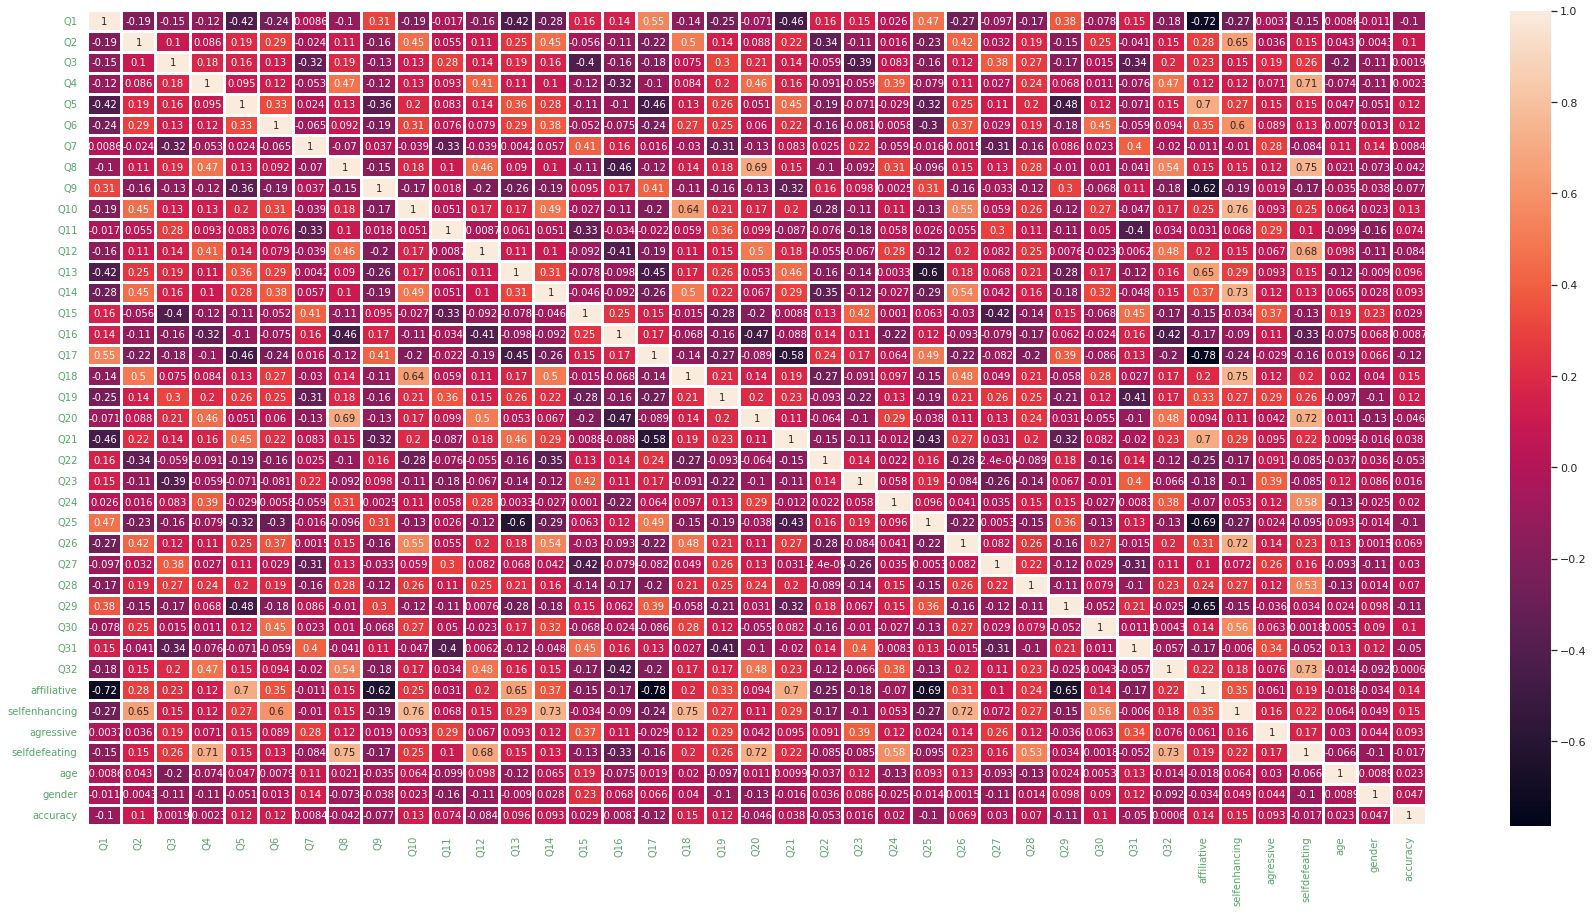

In [8]:
### Correlational graphs
plt.figure(figsize=(30,15))
ax=sns.heatmap(data.corr(),annot=True,linewidth=2,linestyle='--',color='k')
ax.tick_params(color='g',labelsize=10,labelcolor='g')

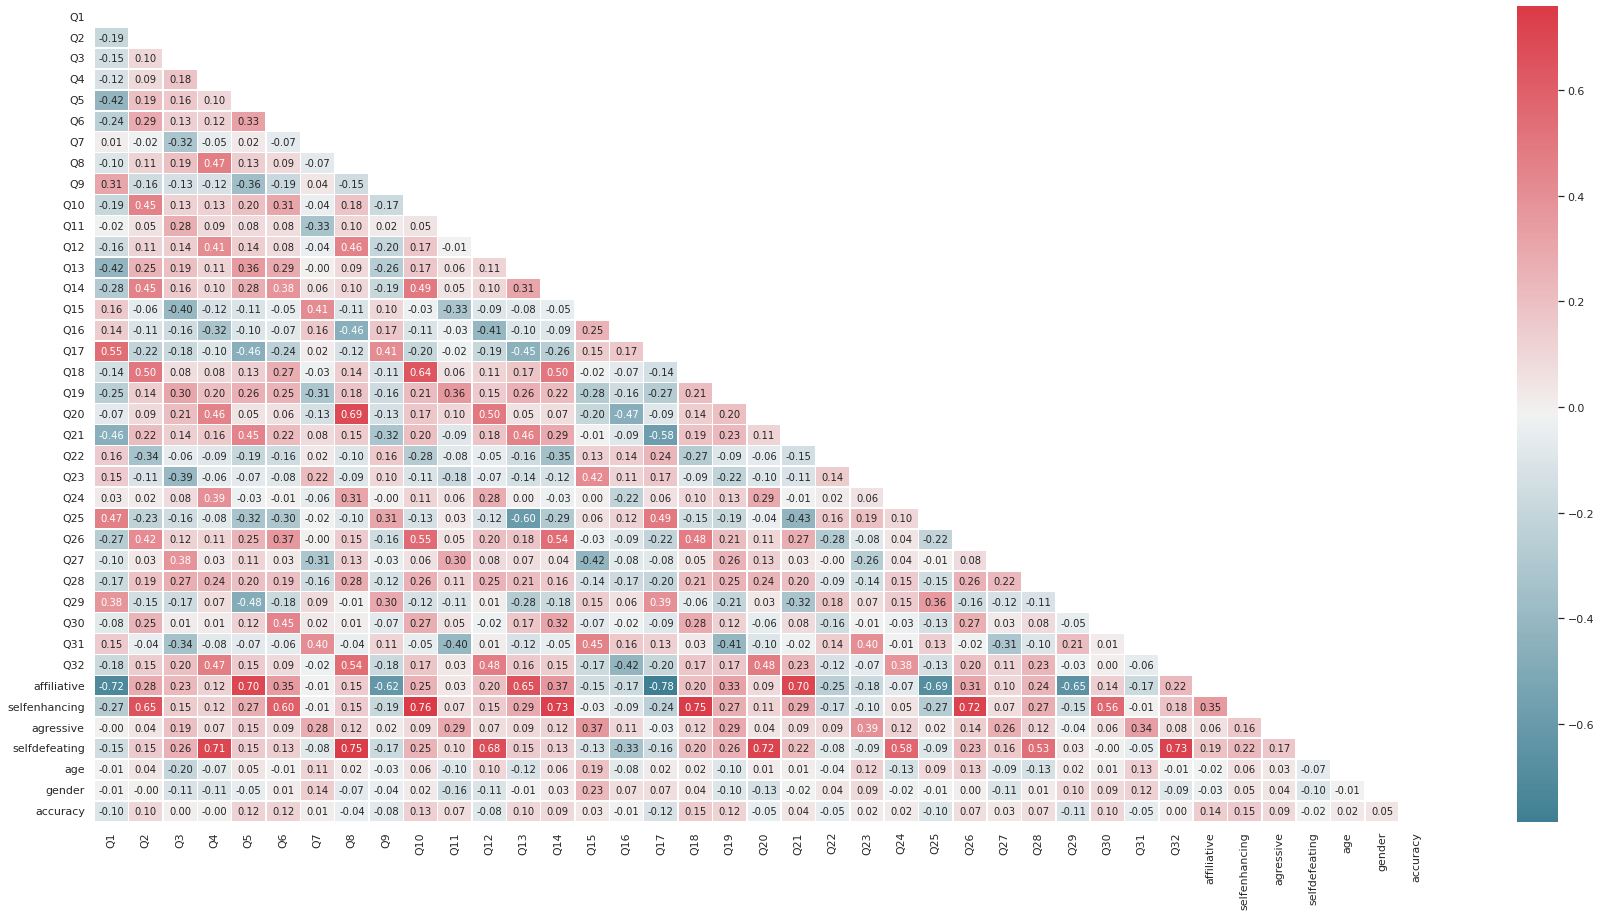

In [9]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(30, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

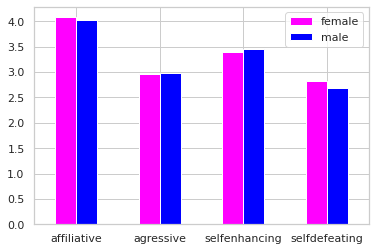

In [10]:
#bar chart comparisons
gender = data.groupby('gender').mean()
gender.index = ['female', 'male']

gender[['affiliative','agressive','selfenhancing','selfdefeating']].T.plot.bar(color=['magenta', 'blue'])

plt.xticks(rotation=0)
plt.show()

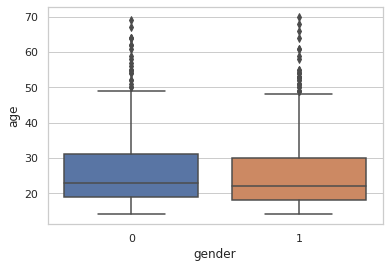

In [11]:
### Box plot
sns.boxplot(y = data['age'], x = data['gender'])

In [12]:
### removing all Q columns we have to check the gender on the basic of 4 humors styles
for x in data.columns:
    if 'Q' in x:
        data.drop(x, axis=1, inplace = True)

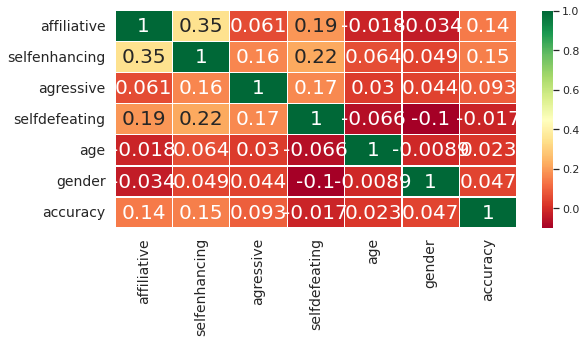

In [13]:
data.drop(['age','accuracy'],axis=1)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(9,4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

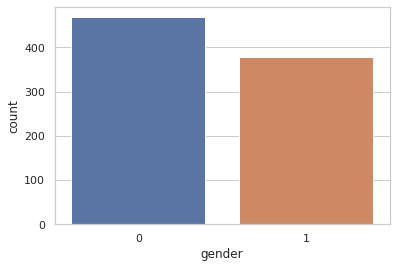

In [14]:
import seaborn as sns
sns.countplot(data['gender'])

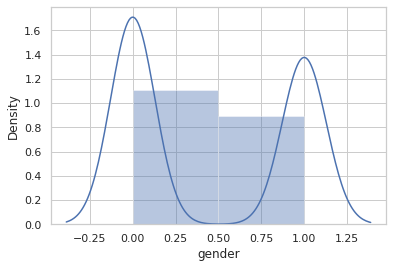

In [15]:
import seaborn as sns
sns.distplot(data['gender'], bins = 2)

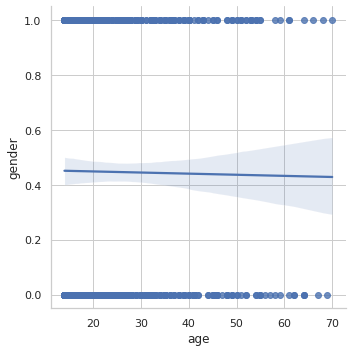

In [16]:
sns.lmplot(x = 'age', y = 'gender', data = data)

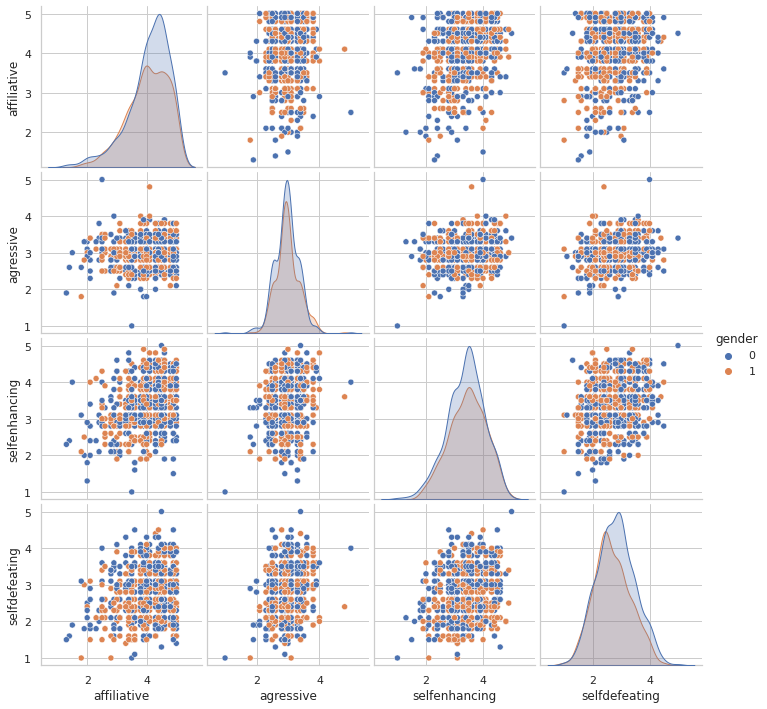

In [17]:
sns.pairplot(data=data,vars=['affiliative','agressive','selfenhancing','selfdefeating'],hue="gender")

# **Creating independent and dependent variable**

In [18]:
X = data.drop(["gender","age","accuracy"], axis=1)
Y = data["gender"]

In [19]:
X.head()

,affiliative,selfenhancing,agressive,selfdefeating
0,4.0,3.5,3.0,2.3
1,3.3,3.5,3.3,2.4
4,4.1,4.1,2.9,2.0
7,4.4,4.1,3.3,2.5
8,4.1,3.3,2.9,2.0


In [20]:
Y.head()

0    1
1    1
4    0
7    0
8    1
Name: gender, dtype: int64

# **Splitting the dataset for traing and testing**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# **Features Scalling**

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **MODEL FITTING AND EVALUATION **

# **Logistic Regression model**

In [24]:
logreg = LogisticRegression()

## fit the model with "train_x" and "train_y"
logreg.fit(x_train,y_train)

LogisticRegression()

In [25]:
## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(x_test)

In [26]:
## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

So, Our accuracy Score is: 0.5739645


In [27]:
#confusion matrix
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68        96
           1       0.51      0.30      0.38        73

    accuracy                           0.57       169
   macro avg       0.55      0.54      0.53       169
weighted avg       0.56      0.57      0.55       169

Confusion matrix:
 [[75 21]
 [51 22]]


# **SVC Model**

In [28]:
from sklearn import svm #support vector Machine

In [29]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [30]:
prediction1=model.predict(x_test)

In [31]:
#confusion matrix
### Accuracy for rbf SVM 
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test,prediction1))
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction1)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.58      0.82      0.68        96
           1       0.47      0.21      0.29        73

    accuracy                           0.56       169
   macro avg       0.52      0.51      0.48       169
weighted avg       0.53      0.56      0.51       169

Confusion matrix:
 [[79 17]
 [58 15]]


In [32]:
model=svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [33]:
prediction2=model.predict(x_test)

In [34]:
#confusion matrix
### Accuracy for linear SVM 
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test,prediction2))
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction2)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72        96
           1       0.00      0.00      0.00        73

    accuracy                           0.57       169
   macro avg       0.28      0.50      0.36       169
weighted avg       0.32      0.57      0.41       169

Confusion matrix:
 [[96  0]
 [73  0]]


# **Decision Tree model**

In [35]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree

In [36]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
prediction4=model.predict(x_test)

In [38]:
#confusion matrix
### Accuracy for Decision Tree
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, prediction4))
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction4)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57        96
           1       0.42      0.41      0.42        73

    accuracy                           0.50       169
   macro avg       0.49      0.49      0.49       169
weighted avg       0.50      0.50      0.50       169

Confusion matrix:
 [[55 41]
 [43 30]]


# **KNN Model**

In [39]:
from sklearn.neighbors import KNeighborsClassifier #KNN

In [40]:
model=KNeighborsClassifier() 
model.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
prediction5=model.predict(x_test)

In [42]:
#confusion matrix
### Accuracy for Decision Tree
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, prediction5))
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction5)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63        96
           1       0.50      0.47      0.48        73

    accuracy                           0.57       169
   macro avg       0.56      0.56      0.56       169
weighted avg       0.56      0.57      0.57       169

Confusion matrix:
 [[62 34]
 [39 34]]


# **Naive bayes model**

In [43]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

In [44]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [45]:
prediction6=model.predict(x_test)

In [46]:
#confusion matrix
### Accuracy for Decision Tree
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, prediction6))
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction6)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.56      0.76      0.64        96
           1       0.39      0.21      0.27        73

    accuracy                           0.52       169
   macro avg       0.48      0.48      0.46       169
weighted avg       0.49      0.52      0.48       169

Confusion matrix:
 [[73 23]
 [58 15]]


# **Random forest model**

In [47]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

In [48]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
prediction7=model.predict(x_test)

In [50]:
#confusion matrix
### Accuracy for Random Forest
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, prediction7))
conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction7)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65        96
           1       0.53      0.48      0.50        73

    accuracy                           0.59       169
   macro avg       0.58      0.58      0.58       169
weighted avg       0.59      0.59      0.59       169

Confusion matrix:
 [[65 31]
 [38 35]]


# **Cross Validation**

In [51]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [52]:
#more heatmaps (ignore errors)
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

In [53]:
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.546807,0.041242
Radial Svm,0.559692,0.042554
Logistic Regression,0.559678,0.050213
KNN,0.542997,0.056866
Decision Tree,0.516050,0.022869
Naive Bayes,0.558655,0.032755
Random Forest,0.547913,0.053681


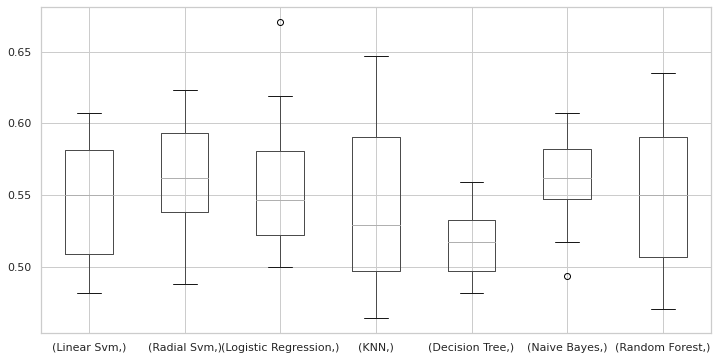

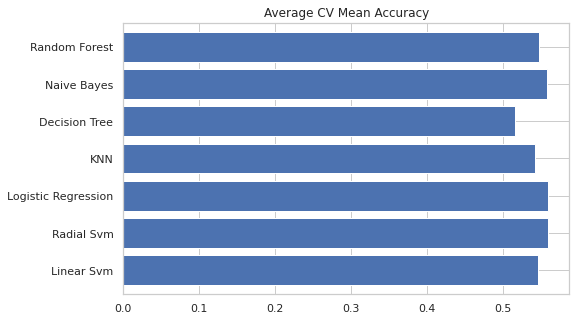

In [54]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

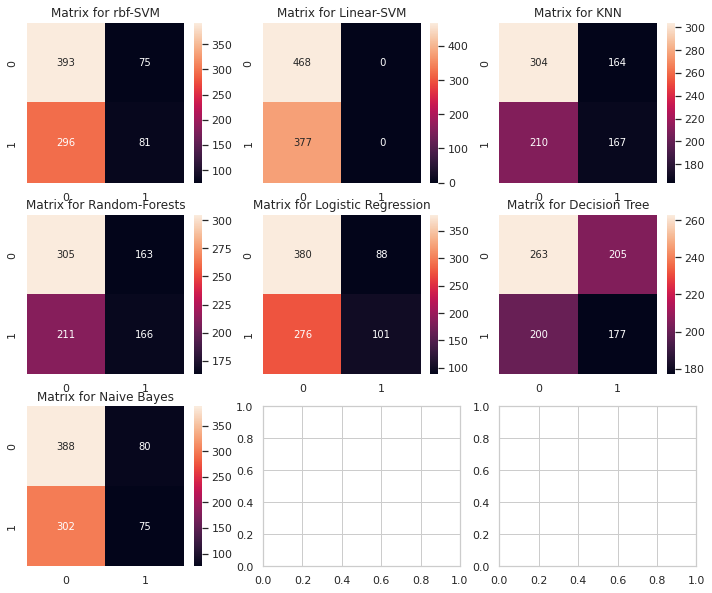

In [55]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

# **Testing Hyper parameter tunning**

In [56]:
from sklearn.model_selection import GridSearchCV
params={
     'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'kernel':['rbf','linear'],
    'degree':[5,10,15,20,25],
    'gamma':['scale','auto']
}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=params,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.5633136094674556
SVC(C=0.4, degree=5)


In [57]:
hyper={ 'n_estimators':[100,200,300]
       }
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.5538461538461539
RandomForestClassifier(random_state=0)


# **ensembling and boosting algorithms**

# Vooting Classifier

In [58]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(x_train,y_train)

In [59]:
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(x_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.5562130177514792
The cross validated score is 0.5468907563025209


# BaggingClassifier

In [60]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(x_test,y_test)
prediction=model.predict(x_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8698224852071006
The cross validated score for bagged KNN is: 0.5443557422969187


# AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.5905462184873949


# GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.5194817927170867


# xgboost

In [63]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.518361344537815


# hyper tunning for adaboosting algorithm

In [64]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.5869822485207101
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


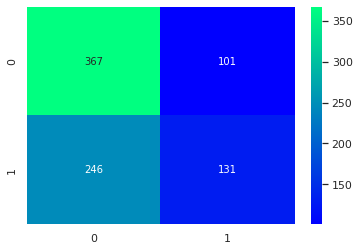

In [65]:
ada=AdaBoostClassifier(n_estimators=300,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

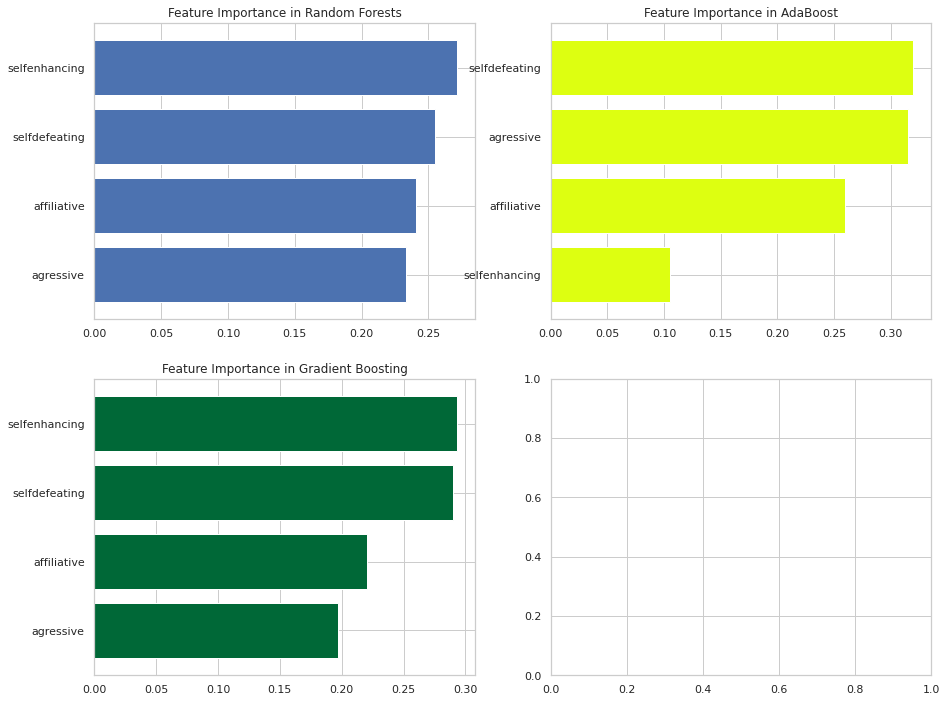

In [68]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
x_train=pd.DataFrame(x_train)
features = list(x_train.select_dtypes(include = ['int64','float64']).columns)

dtrain =xg.XGBClassifier(x_train[features], y_train)
dval   = xg.XGBClassifier(x_test[features], y_test)
params1 = {'max_depth' : 7,'max_leaves' : 15,'objective' : 'binary:logistic','grow_policy' : 'lossguide', 'eta' : 0.7, 'eval_metric':'auc'}
evallist = [(dval, 'validation'), (dtrain, 'train')]
num_round=50
model1 = xg.XGBClassifier(params1, dtrain,num_round,evallist)